In [1]:
import networkx as nx
import numpy as np
import warnings
from networkx.algorithms.community import k_clique_communities
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')
import csv
import pandas as pd
import operator
import community as community
import random

### Introduction

For this analysis I decided to work only on characters that we already have the opportunity to see in movies (from Marvel Studio, X-men movies of 20th Century Fox, Spiderman of Columbia Pictures, 4 Fantastic of 20th Century Fox, Deadpool of 20th Century Fox, ...). With those characters from different studio, I wanted to see which characters could be introduce in the future movie of Marvel Studio, since they will be a lot of change after 'ENDGAME'.

In [2]:
G=nx.read_edgelist('hero-network.csv', delimiter=';', nodetype=str, encoding="utf-8")

In [3]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 6421
Number of edges: 167112
Average degree:  52.0517


In [4]:
marvel_movie = marvel_movie = open("marvel_movie.txt", "r")
marvel_movie = marvel_movie.read().split(' ;\n')
G_copy = G.copy()
G_movie = G_copy.subgraph(marvel_movie)
print(nx.info(G_movie))

Name: 
Type: Graph
Number of nodes: 154
Number of edges: 4181
Average degree:  54.2987


First, I download as before my full network. However, after that i did a sub-network with only characters that appear in movies. To do so i check on Wikipedia for every movie (from Marvel Studio, X-men, 4 Fantastic, and other movies about the marvel universe that I know) which characters are in the movie, and then i check on my database if this character exists in the dc comics. Then when I found a character, I copy paste the name of this character on a new database ('marvel_movie.txt'), then I did a sub-network with those $154$ characters.

### Network Visualisation

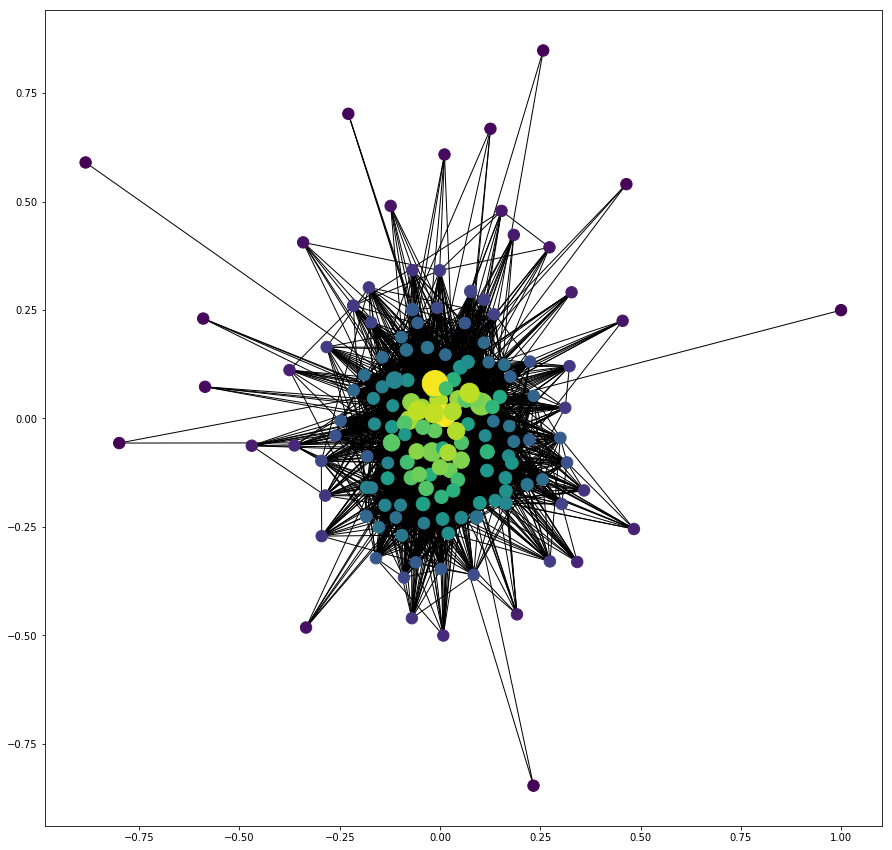

In [61]:
pos = nx.spring_layout(G_movie)
betCent = nx.betweenness_centrality(G_movie, normalized=True, endpoints=True)
node_color = [2000.0 * G_movie.degree(v) for v in G_movie]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(15,15))
nx.draw_networkx(G_movie, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )

Here I plot the new network with only movie characters. The difference between the color of the nodes represent how much degree have one node (lighter it is, the highest degree the node has). The difference between the size of the nodes represent how much its betweenness centrality is high. I chose the betweenness centrality measure because it's the number of shortest paths a character lies upon, therefore with this measure a node is important when he makes quicker connection between the characters.

We can see on this representation that the characters are highly connected in the DC comics. However only few nodes are bigger than the other one, it means that only few nodes have higher betweenness centrality. As before we can think of the Avengers for these nodes. The lighter nodes are in the center of this network this is normal, since they are the nodes with the highest degree. We can notice that there is only a few in yellow, that means that there are some characters with really higher degree than the others.

### Analysis on centrality measures

In [8]:
liste = [nx.degree_centrality(G_movie),
            nx.closeness_centrality(G_movie),
            nx.betweenness_centrality(G_movie),
            nx.pagerank(G_movie),
            nx.eigenvector_centrality(G_movie),]

In [9]:
many = 10
number = 5*many
dico = {'Character':[0]*number,"deg":['']*number , 'closeness':['']*number, 'between':['']*number, 'pagerank':['']*number, 'eigenvector':['']*number}
df_max = pd.DataFrame(data=dico)

k = 0
l = 1
for i in range (5):
    liste_sort = sorted(liste[i].items(), key=operator.itemgetter(1) , reverse = True)   
    for j in range(many):
        index = liste_sort[j]
        #import pdb; pdb.set_trace()
        df_max.iloc[j+k,df_max.columns.get_loc('Character')] = index[0]
        df_max.iloc[j+k,l] = index[1]
    l = l + 1
    k = k + many

    
for key in dico:
    if (key != 'Character'):
        print ('the Top ',many,'character according to the measure', key, 'are :')
        print(df_max.loc[(df_max.loc[:,key]!='')][['Character',key]])
        print('')

the Top  10 character according to the measure deg are :
              Character       deg
0       CAPTAIN AMERICA  0.849673
1   IRON MAN/TONY STARK  0.836601
2  SPIDER-MAN/PETER PAR  0.771242
3  MR. FANTASTIC/REED R  0.764706
4   SCARLET WITCH/WANDA  0.764706
5   WASP/JANET VAN DYNE   0.75817
6  THOR/DR. DONALD BLAK  0.751634
7                VISION  0.751634
8  THING/BENJAMIN J. GR  0.738562
9       WOLVERINE/LOGAN  0.738562

the Top  10 character according to the measure closeness are :
               Character closeness
10       CAPTAIN AMERICA  0.859551
11   IRON MAN/TONY STARK  0.859551
12  SPIDER-MAN/PETER PAR   0.81383
13  MR. FANTASTIC/REED R  0.809524
14   SCARLET WITCH/WANDA  0.809524
15   WASP/JANET VAN DYNE  0.805263
16  THOR/DR. DONALD BLAK  0.801047
17                VISION  0.801047
18  THING/BENJAMIN J. GR  0.792746
19       WOLVERINE/LOGAN  0.792746

the Top  10 character according to the measure between are :
               Character    between
20   IRON MAN/TONY STA

My study here is about the centrality measure as before. I won't make a study on every measure, but just in global.

We can see here the same characters as before with some differences. Indeed, now there is more characters from Avengers than before (Captain America, Iron Man, Spider Man, Scarlet Witch, Wasp, Thor, Hulk, Vision). But there is less 4 Fantastic (only Mr. Fantastic and Thing appears, we don't see any more Torch and Invisible Woman). Furthermore, we observe that Beast doesn't appear anymore in the top 10 (only for eigenvector), therefore now there is only Wolverine and Scarlet Witch from X-men.

We can analyze the fact that the Wasp is now on the top 10 because in the DC comics she is one of the first Avengers. Even if in the movies she is just a second character in Ant Man. Scarlet Witch, says as before, now is appearing in the top 10 because she is part from X-men and Avengers in the comics. Since we selected Avengers and X-men this is normal that she is in the top 10. Now we also have Vision, this character is important in the movie "Avengers: Edge of Ultron" and also in "Avengers: Infinity War" (in the last one he died actually). However, it's still a second character in the movies. The fact that Vision raised in the ranking can be explain by the fact that in "Infinity War" we saw him dating with Scarlet Witch. Therefore, since Scarlet with is an important character, Vision will become one too.

### Analysis on Community

In [40]:
seed = 2
random.seed(seed)
np.random.seed(seed)
partition = community.best_partition(G_movie,random_state=seed)

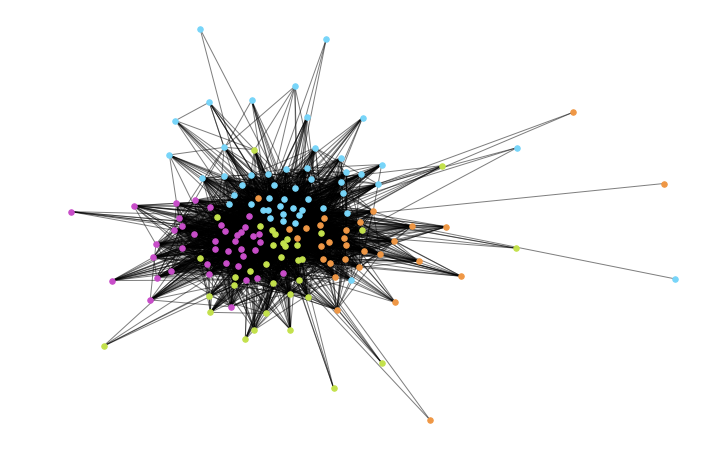

In [57]:
labels = set(partition.values())
community_counts = {i: list(partition.values()).count(i) for i in labels}
community_counts
colormap = np.array(["#ef9745","#c84dc9" , "#77d5f9", "#c3e14c"])


plt.figure(figsize=(12,8))
pos = nx.spring_layout(G_movie,seed=seed)

count = 0
for com in set(partition.values()) :
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G_movie, pos, list_nodes, node_size = 30, node_color = colormap[count])
    count = count + 1

nx.draw_networkx_edges(G_movie, pos, alpha=0.5)
plt.axis('off')
plt.show()

Now we find the best partition using the Louvain algorithm. Since the algorithm involves some randomization, I try to fix the random seed, but it didn't work, so please don't run the code, otherwise it could change my interpretation. 

After I plot the network so that each node's color represents the community it belongs to, we can see that we have 4 communities. It is still a high connected network, but we can see that there is more isolated character in the orange and the blue community than in the pink and green one. Next, we will plot each community to analyze it individually.

In [42]:
def draw_comm(G):
    pos = nx.spring_layout(G,seed=seed)
    betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
    node_color = [20000.0 * G.degree(v) for v in G]
    node_size =  [v * 50000 for v in betCent.values()]
    plt.figure(figsize=(20,20))
    nx.draw_networkx(G, pos=pos, with_labels=True,
                     node_color=node_color,
                     node_size=node_size,
                     edge_color = "#efefef")

Name: 
Type: Graph
Number of nodes: 30
Number of edges: 265
Average degree:  17.6667


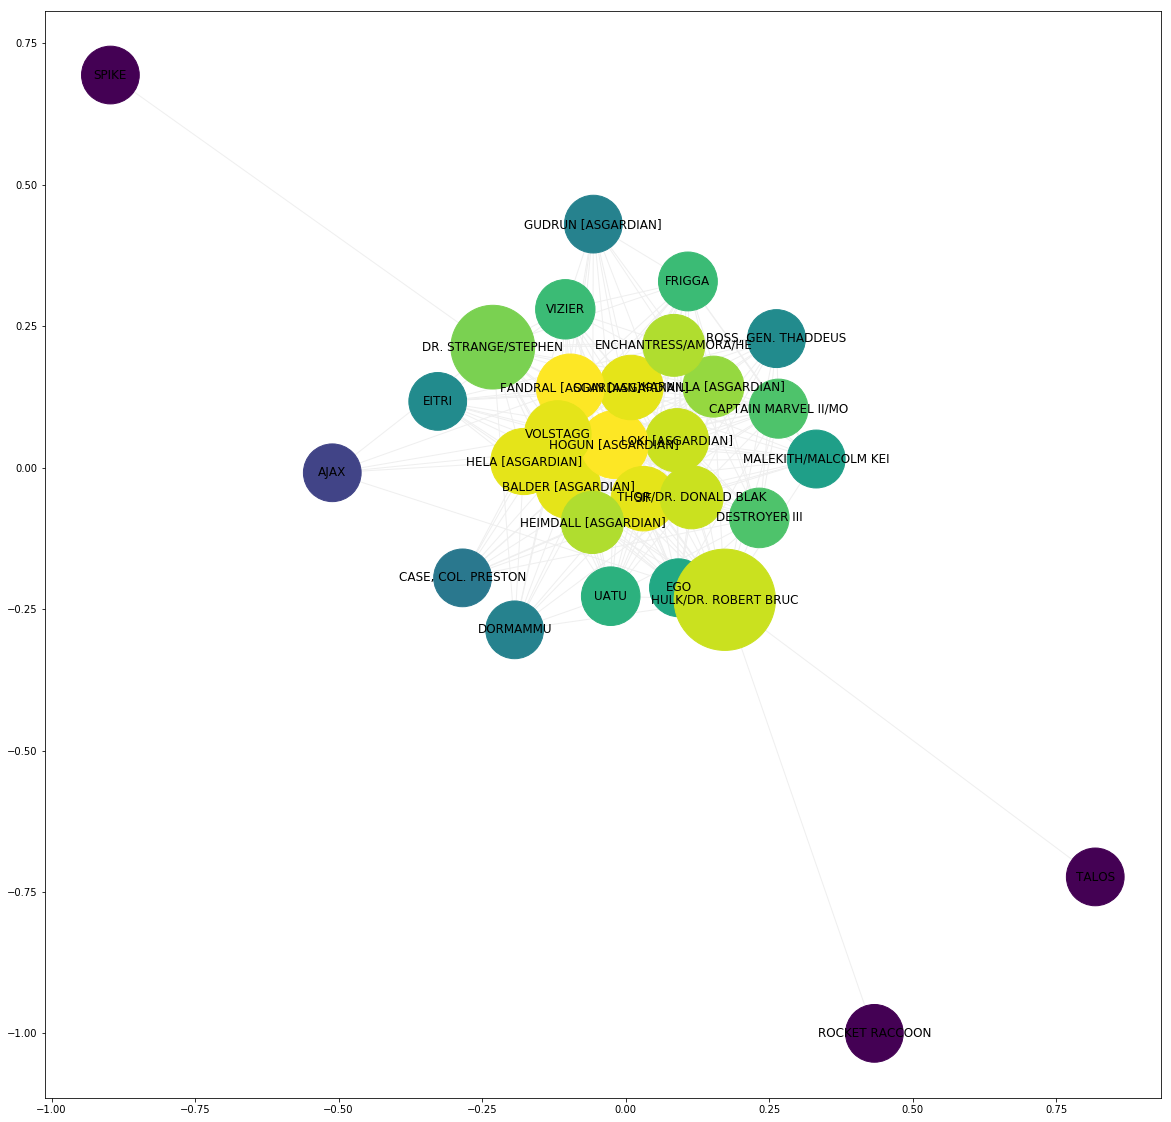

In [43]:
c0 = [nodes for nodes in partition.keys() if partition[nodes] == 0]
G0 = G_movie.subgraph(c0)
print(nx.info(G0))
draw_comm(G0)

Here we plot the first community, as we can see this community seems to reflect the Asguardian community (the one of Thor). Indeed, in the center there is only Asgard people with Thor in the center.

We can also see that Hulk and Dr. Strange are important nodes in this community. This is also true in the movie because in 'Thor Ragnarok', Dr. Strange and Hulk are presents with Thor.

Furthermore, we can see that there is Rocket Racoon (a character from 'The Guardians of the Galaxy'), but this is not surprising since in 'Infinity War' Rocket and Thor seems to be friends. However, he has low degree, but this can be explained by the fact that it's a new character in the marvel DC comics.

Name: 
Type: Graph
Number of nodes: 40
Number of edges: 584
Average degree:  29.2000


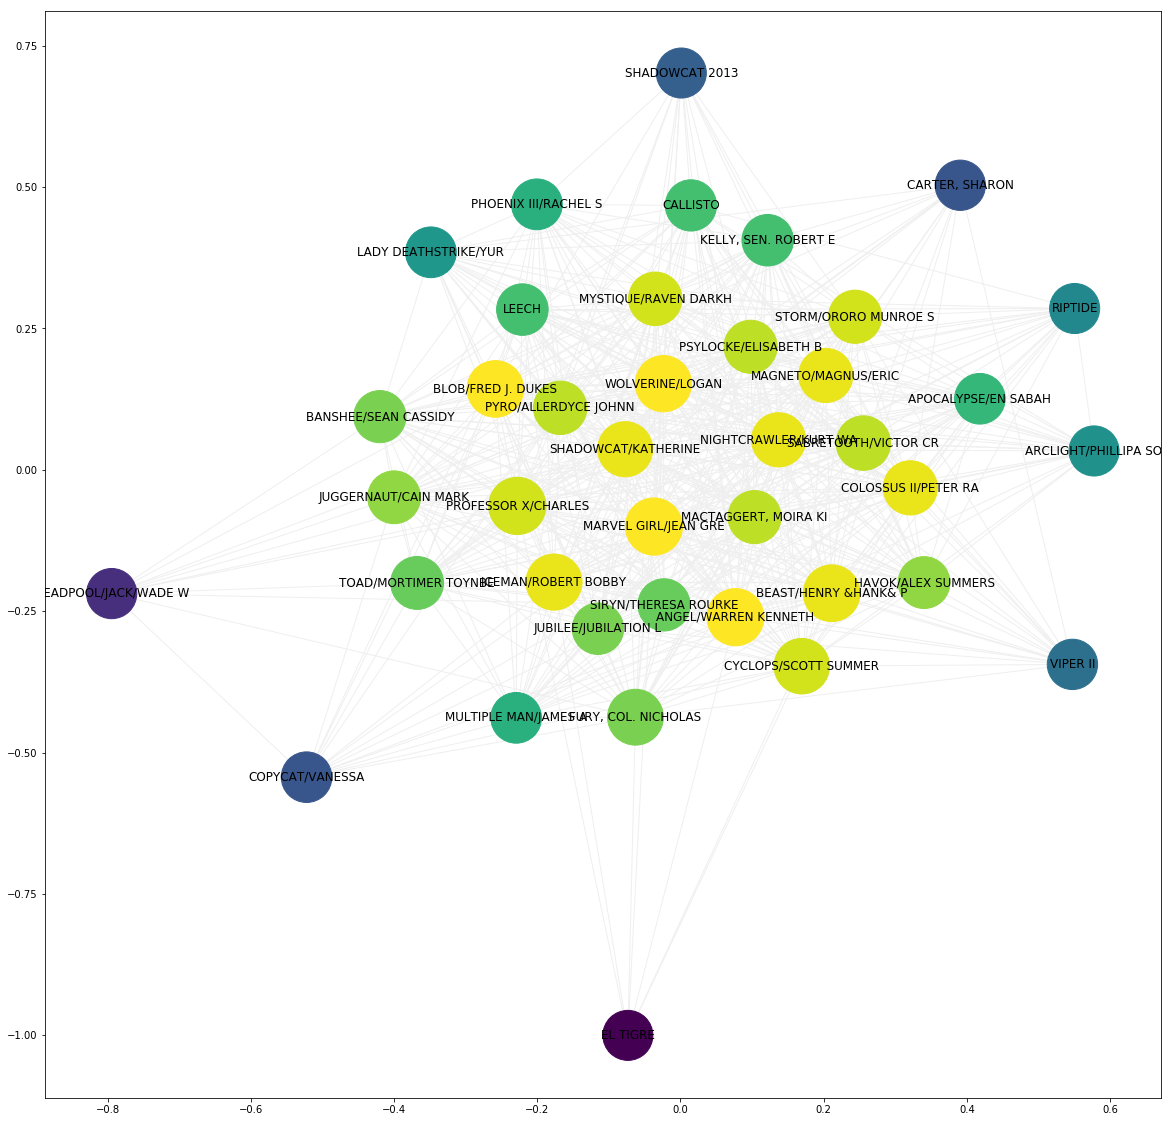

In [44]:
c1 = [nodes for nodes in partition.keys() if partition[nodes] == 1]
G1 = G_movie.subgraph(c1)
print(nx.info(G1))
draw_comm(G1)

Here we plot the second community, as we can see this community seems to reflect the X-men community. Indeed, we can see some important characters such as Marvel Girl, Cyclops, Wolverine, Beast, ... This network is interesting because it's really split, there is no characters more important than the other one. We could expect Professor X, Magneto or Wolverine to be in the center since they are the characters who gather the X-men.

We can see that there is also Deadpool in this network. It is quite interesting since in his movie there is 2 X-men with him (Colossus and Sonic). Therefore, the link between X-men and Deadpool is also strong in the DC comics as in the movies.

However, there is one strange node: Nick Fury. Indeed, he is the man in charge of the Avengers, but he is in a network with only X-men. Therefore, this can be a clue to our forecasting: maybe Nick Fury will hire some X-men to join to the Avengers (Nick Fury didn't die in the last Avengers, so he may stay alive in the new one).

Name: 
Type: Graph
Number of nodes: 49
Number of edges: 505
Average degree:  20.6122


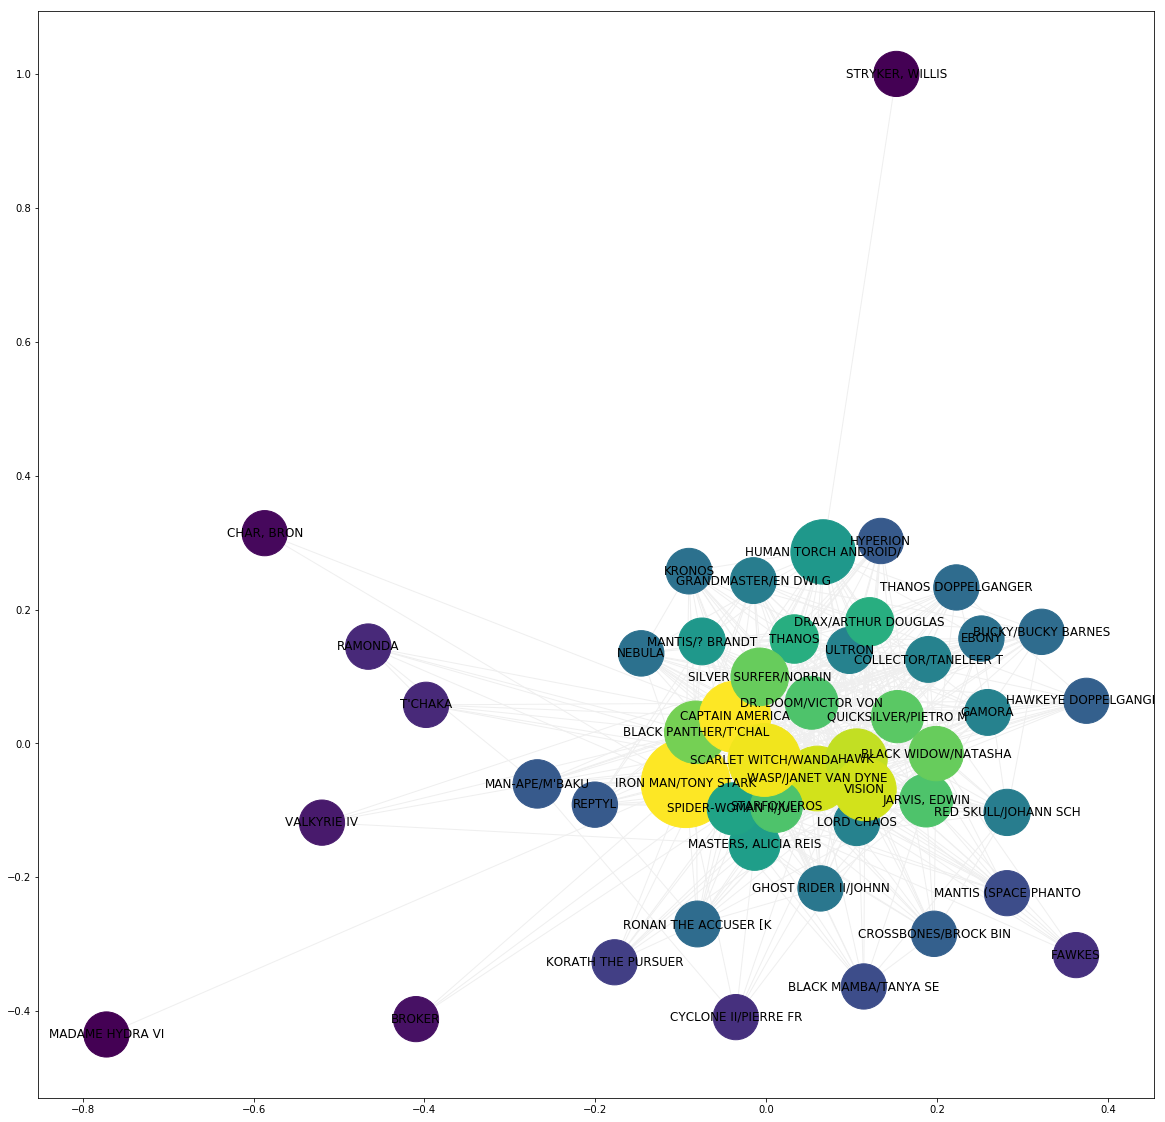

In [45]:
c2 = [nodes for nodes in partition.keys() if partition[nodes] == 2]
G2 = G_movie.subgraph(c2)
print(nx.info(G2))
draw_comm(G2)

Here we plot the third community, as we can see this community seems to reflect the Avengers community. Indeed, the most important nodes are the famous avengers: Iron Man, Captain America, Scarlet Witch, Wasp, Black Panther, Black Widow, ...

We also see a deep connection with the Guardians of the Galaxy with Gamora, Mantis, Nebula and Drax. This is relevant because they merge the two universes in the last Avengers.

We also notice that the darker the nodes are, more likely they are to be villains. Indeed, we can notice Thanos, Red Skull, M'Baku, Ultron, ... This is what we could expected since super heroes are more connected together than with the villains.

However, we notice two unusual character: Silver Surfer and Dr. Doom. Those characters are part of the 4 Fantastic universe in the movie and not from Avengers, but maybe that show a future link for the Avengers. (Silver Surfer is an anti-hero, he is not bad, not good. Dr. Doom is a villain).

Name: 
Type: Graph
Number of nodes: 35
Number of edges: 302
Average degree:  17.2571


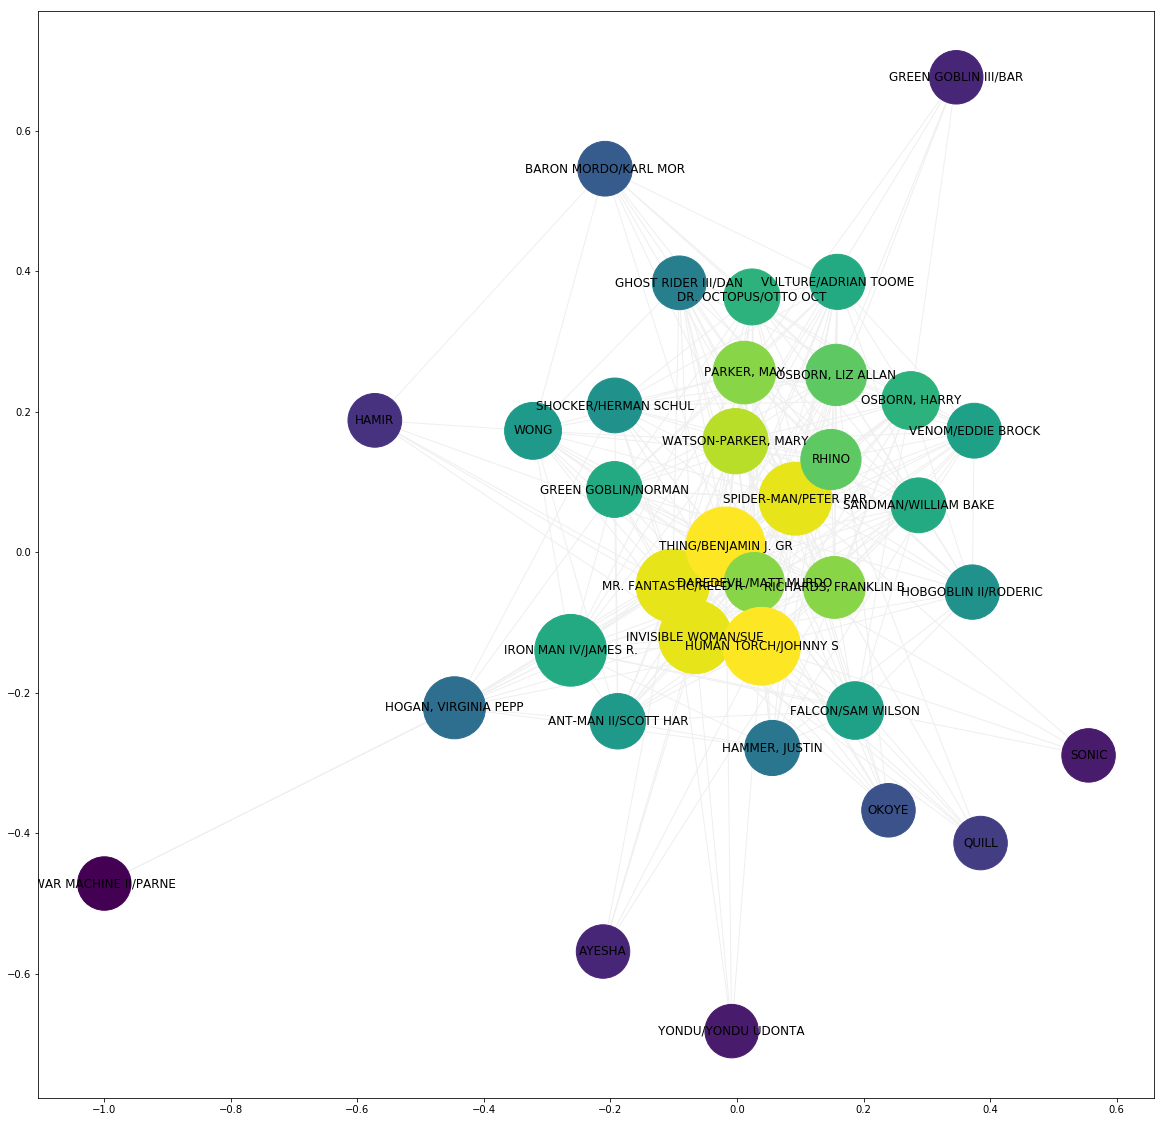

In [46]:
c3 = [nodes for nodes in partition.keys() if partition[nodes] == 3]
G3 = G_movie.subgraph(c3)
print(nx.info(G3))
draw_comm(G3)

Here we plot the fourth community, as we can see this community seems to reflect the 4 Fantastic with Spider Man community. This is really interesting because with this network we figure out only 5 important nodes: the 4 Fantastic and Spider Man. Thanks to this community we can maybe think that one of the next movies of Marvel Studio will be Spider Man who meet the 4 Fantastic. Like that maybe they will introduce new avengers to replace the previous one with the 4 Fantastic. And this is relevant, because we already saw the importance of the 4 Fantastic, and now we have maybe the links between Avengers and the 4 Fantastic.

Furthermore, there is some new avengers in this network such as War Machine, Ant Man and Falcon, this show a strong relation between the 4 Fantastic and the Avengers.

We also see every villain connected to Spider Man, such as Sandman, Green Goblin and Vulture. This show the true community of Spider Man. Highly connected to 4 Fantastic.

### Conclusion

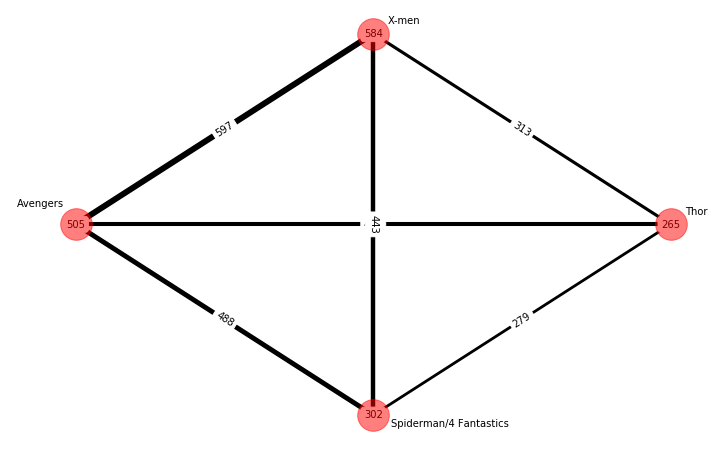

In [62]:
G_com = community.induced_graph(partition, G_movie)

def plot_graph(G):
    plt.figure(figsize=(12,8))
    pos = nx.circular_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=1000, alpha=0.5)
    nx.draw_networkx_edges(G, pos, width = [d['weight']/100 for u,v,d in G.edges(data=True)])
    edge_labels=dict([((u,v), d['weight']) for u,v,d in G.edges(data=True)])
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.text(1+0.05, 0+0.05, 'Thor')
    plt.text(0+0.05, 1+0.05, 'X-men')
    plt.text(-1.2, +0.09,'Avengers')
    plt.text(0+0.06, -1-0.06,'Spiderman/4 Fantastics')
    plt.axis('off')
    plt.show()

plot_graph(G_com)

To conclude on my work, I plot the graph between the different communities. The numbers represent the number of links between two communities (in a node, it's the number of edges in the community itself). We can see with this graph that the most important community is the one of the Avengers as expected (it's the community the most connected with the others). However, the community of the X-men is really important. This is why we can think of maybe a future movie between these two worlds.

But the most likely featuring will may be Spiderman and the 4 Fantastic. Indeed, we already know that they will be 'Spiderman: Far From Home' after 'Avengers: ENDGAME', and we saw that Spiderman and the 4 Fantastic are highly correlated in the DC comics. Therefore, to introduce the 4 Fantastic, maybe Marvel Studio will use Spiderman. 